# Counterintuitive Challenges in ML Debugging

# Case Study: Debugging a Simple Model
## Create the Dataset

In [1]:
# Reset environment for a new run
# %reset -f  # This will reset all variables and settings. do not '% reset' with space between the two.

In [2]:
# Load libraries
from os.path import join # for joining file pathfile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# set pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

Create the data. Your data consists of one feature with values 0 to 9, and your labels are the same data with some noise added. In a dataset, by convention, rows are examples and columns are features. To match this convention, transpose your data. Before transposing your vectors, you must convert them to matrices.

In [3]:
features = np.array(range(10))
features = features[:, np.newaxis]
features

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
# Create labels by adding noise distributed around 0
labels = features + np.random.random(size=[10,1]) - 0.5 # == np.random.random(size=(10,1)) - 0.5
# 임의의 +- 0.5를 features값(0-9) 에 더하여 노이즈 발생시킴

In [5]:
labels

array([[0.34658202],
       [0.69583711],
       [1.54438631],
       [2.95080451],
       [3.68748712],
       [5.10656269],
       [5.62801661],
       [7.41058569],
       [8.19753433],
       [8.8433151 ]])

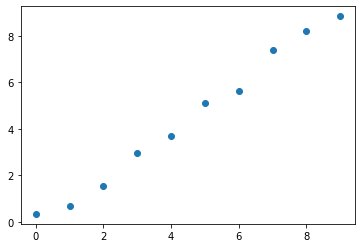

In [6]:
# Verify that the data roughly lies in a straight line and, therefore, is easily predicted..
plt.scatter(features, labels)

## Fit Simple Data with Simple Model

In [7]:
# Delete any existing assignment to 'model'
model = None

model = tf.keras.models.Sequential()
# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(tf.keras.layers.Dense(units=1, activation='tanh', input_dim=1))

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(features, labels, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 754ms/step - loss: 37.1913
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 37.1852
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 37.1789
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 37.1727
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 37.1664
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 37.1600
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 37.1535
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 37.1470
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 37.1405
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 37.1338


Your loss stubbornly refuses to decrease! The following list describes possible actions to debug your model.

* **Transforming data**: You data is not transformed. You can experiment by transforming the data appropriately and retraining the model.
* **Activation function**: The `tanh` activation function cannot predict values >1. Besides, in a regression problem, the last layer should always use the linear activation function. Therefore, should you use  `activation='linear'`?
* **Hyperparameter values**: Should you adjust any hyperparameter values to try reducing loss?
* **Simpler model**: The model development process recommends starting with a simple model. A linear model is simpler than your nonlinear model. Should you use `activation='linear'`?
* **Change optimizer**: Your model uses the Adam optimizer. You can fall back to the gradient descent optimizer by using `optimizer=keras.optimizers.SGD()`.

Consider these actions and experiment where necessary. Then read the following section for the solution.

## Solution: Getting Loss to Decrease

Before trying to adjust specific model parameters, such as the hyperparameter values, you should first check for good development practices. Here, you should start with a linear model because of these two best practices:

* Regression: <span style='color:red'>In a regression problem, the last layer must always be linear.</span>
* Start simple: Since a linear model is simpler than a nonliner model, start with a linear model.

Run the following code to train a linear model and check if your loss decreases. The code displays the loss curve.

Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.4555
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4012
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3535
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3149
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2697
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2422
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2109
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1916
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1688
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1533


Text(0.5, 1.0, 'Loss Curve')

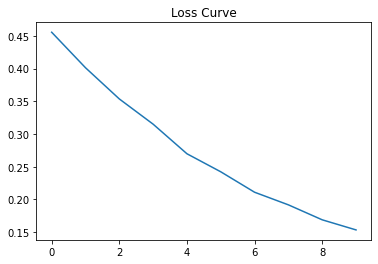

In [9]:
model = None
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_dim=1))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
trainHistory = model.fit(features, labels, epochs=10, batch_size=1, verbose=1)
# plot loss curve
plt.plot(trainHistory.history['loss'])
plt.title('Loss Curve')

Your loss decreases, albeit slowly! You're on the right track. How can you get your loss to converge? Experiment with the code above. For the solution, read the following section.

## Solution: Reaching Convergence

Your loss isn't decreasing fast enough. From the guidance on [Learning Rate](https://developers.google.com/machine-learning/crash-course/reducing-loss/learning-rate), you know that you can increase the learning rate to train faster. Run the following code to increase the learning rate to 0.1. The the model reaches convergence quickly.

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 62.2198
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 15.1453
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 1.5858
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 1.7775
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 1.5902


Text(0.5, 1.0, 'Loss Curve')

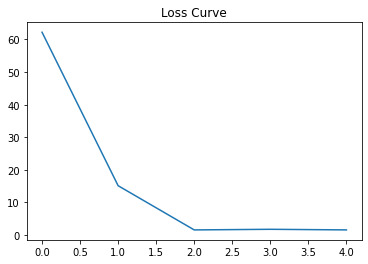

In [10]:
# Delete any existing assignment to 'model'
model = None

# Use a Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_dim=1))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.1))
trainHistory = model.fit(features, labels, batch_size=1, epochs=5, verbose=1)
# plot loss curve
plt.plot(trainHistory.history['loss'])
plt.title('Loss Curve')

Wonderful, you quickly get a very low loss! Let's confirm the model works by predicting results for values [0,9] and superimposing them on top of the features.

1/1 [==============================] - 0s 226ms/step


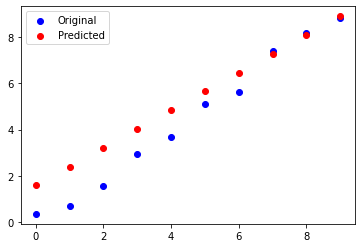

In [11]:
# get predictions
featurePred = model.predict(features, verbose=1)
# plot original features and predicted values
featurePred = np.transpose(featurePred)
plt.scatter(range(10), labels, c='blue')
plt.scatter(range(10), featurePred, c='red')
plt.legend(['Original', 'Predicted'])

# Exploding Gradients

A common problem in model training is a loss that "explodes" or becomes `nan`. A common cause is anomalous feature data, such as outliers and `nan` values, or a high learning rate. The following sections demonstrate these causes.

## Cause: High Learning Rate

In this section, you will create data in the range [0,50] and show that the gradient explodes when you train the model using a learning rate of 0.01. Then you'll reduce the learning rate to make the model converge.

Create and visualize the data by running the following code.

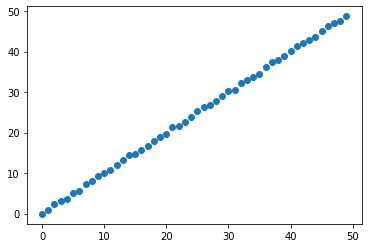

In [12]:
features = np.arange(50)
labels = features + np.random.random(features.shape) - 0.5
plt.scatter(features, labels)

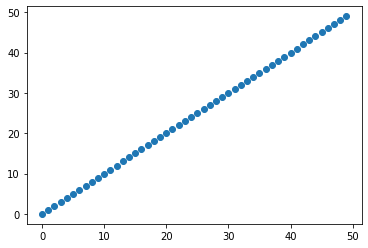

In [13]:
[features, labels] = [features.transpose(), labels.transpose()]
plt.scatter(range(len(features)), features)

Run the following cell to train a model with a learning rate of 0.01. You will get `inf` for your loss.

In [14]:
# Train on raw data
model = None
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.01))
model.fit(features, labels, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
5/5 [==============================] - 0s 2ms/step - loss: 1622745284608.0000
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 226966757499086280065024.0000
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 143042931669792691045162888818851840.0000
Epoch 4/5
5/5 [==============================] - 0s 5ms/step - loss: inf
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: inf


To demonstrate that the high learning rate makes the loss explore, reduce the learning rate to `0.001`. Your loss will converge.